<a href="https://colab.research.google.com/github/am-galal/healthcare-predictive-analytical-application-for-heart-diseases/blob/remon/Graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pd.set_option('display.max_columns', None)

path = "/content/drive/MyDrive/DEPI/graduation project /dataset/heart_2022_with_nans.csv"
data=pd.read_csv(path)

In [5]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

#feature selection


In [7]:
relevant_columns = [
    'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
    'HadAngina', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
    'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
    'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HighRiskLastYear',
    'CovidPos', 'HadHeartAttack'  # Include the target variable
]

# Drop the non-relevant columns
data_reduced = data[relevant_columns]


In [8]:
data_reduced.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear,CovidPos,HadHeartAttack
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,Yes,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,No,No,No,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,68.04,26.57,No,No,No,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,63.50,25.61,No,No,Yes,No
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,No,No,Yes,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,63.50,23.30,No,No,No,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,53.98,21.77,Yes,No,No,No


In [9]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              443934 non-null  object 
 2   PhysicalHealthDays         434205 non-null  float64
 3   MentalHealthDays           436065 non-null  float64
 4   LastCheckupTime            436824 non-null  object 
 5   PhysicalActivities         444039 non-null  object 
 6   SleepHours                 439679 non-null  float64
 7   RemovedTeeth               433772 non-null  object 
 8   HadAngina                  440727 non-null  object 
 9   HadStroke                  443575 non-null  object 
 10  HadCOPD                    442913 non-null  object 
 11  HadDepressiveDisorder      442320 non-null  object 
 12  HadKidneyDisease           443206 non-null  object 
 13  HadArthritis               44

In [10]:
data_reduced.isnull().sum()

,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadAngina,4405
HadStroke,1557


In [11]:

# Check the percentage and number of Missing Values
def check_per_nulls(df):
  null_percentage = (df.isnull().sum() / len(df)) * 100
  null_counts = df.isnull().sum()

  null_percentage_df = pd.DataFrame({'Column': df.columns,  'Number of Nulls': null_counts , "Length of DF" : len(df), 'Null Percentage': null_percentage})
  null_percentage_df.index = range(len(null_percentage_df))

  print(null_percentage_df)

In [12]:
check_per_nulls(data_reduced)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0        445132         0.000000
1               GeneralHealth             1198        445132         0.269134
2          PhysicalHealthDays            10927        445132         2.454777
3            MentalHealthDays             9067        445132         2.036924
4             LastCheckupTime             8308        445132         1.866413
5          PhysicalActivities             1093        445132         0.245545
6                  SleepHours             5453        445132         1.225030
7                RemovedTeeth            11360        445132         2.552052
8                   HadAngina             4405        445132         0.989594
9                   HadStroke             1557        445132         0.349784
10                    HadCOPD             2219        445132         0.498504
11      HadDepressiveDisorder             2812        445132    

In [13]:
data_reduced['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
No,416959
Yes,25108


In [14]:
heart_attack_yes = data_reduced[data_reduced['HadHeartAttack'] == 'Yes']
heart_attack_no = data_reduced[data_reduced['HadHeartAttack'] == 'No']

In [15]:
heart_attack_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25108 entries, 5 to 445130
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        25108 non-null  object 
 1   GeneralHealth              24995 non-null  object 
 2   PhysicalHealthDays         24146 non-null  float64
 3   MentalHealthDays           24405 non-null  float64
 4   LastCheckupTime            24779 non-null  object 
 5   PhysicalActivities         25017 non-null  object 
 6   SleepHours                 24591 non-null  float64
 7   RemovedTeeth               24067 non-null  object 
 8   HadAngina                  23879 non-null  object 
 9   HadStroke                  24906 non-null  object 
 10  HadCOPD                    24888 non-null  object 
 11  HadDepressiveDisorder      24929 non-null  object 
 12  HadKidneyDisease           24896 non-null  object 
 13  HadArthritis               24959 non-null  object 

In [16]:
heart_attack_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416959 entries, 0 to 445131
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        416959 non-null  object 
 1   GeneralHealth              415977 non-null  object 
 2   PhysicalHealthDays         407324 non-null  float64
 3   MentalHealthDays           408870 non-null  float64
 4   LastCheckupTime            409247 non-null  object 
 5   PhysicalActivities         416078 non-null  object 
 6   SleepHours                 412280 non-null  float64
 7   RemovedTeeth               406990 non-null  object 
 8   HadAngina                  414600 non-null  object 
 9   HadStroke                  416091 non-null  object 
 10  HadCOPD                    415341 non-null  object 
 11  HadDepressiveDisorder      414717 non-null  object 
 12  HadKidneyDisease           415557 non-null  object 
 13  HadArthritis               414795 

In [17]:
check_per_nulls(heart_attack_yes)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0         25108         0.000000
1               GeneralHealth              113         25108         0.450056
2          PhysicalHealthDays              962         25108         3.831448
3            MentalHealthDays              703         25108         2.799904
4             LastCheckupTime              329         25108         1.310339
5          PhysicalActivities               91         25108         0.362434
6                  SleepHours              517         25108         2.059105
7                RemovedTeeth             1041         25108         4.146089
8                   HadAngina             1229         25108         4.894854
9                   HadStroke              202         25108         0.804524
10                    HadCOPD              220         25108         0.876215
11      HadDepressiveDisorder              179         25108    

In [18]:
check_per_nulls(heart_attack_no)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0        416959         0.000000
1               GeneralHealth              982        416959         0.235515
2          PhysicalHealthDays             9635        416959         2.310779
3            MentalHealthDays             8089        416959         1.939999
4             LastCheckupTime             7712        416959         1.849582
5          PhysicalActivities              881        416959         0.211292
6                  SleepHours             4679        416959         1.122173
7                RemovedTeeth             9969        416959         2.390883
8                   HadAngina             2359        416959         0.565763
9                   HadStroke              868        416959         0.208174
10                    HadCOPD             1618        416959         0.388048
11      HadDepressiveDisorder             2242        416959    

In [19]:
heart_attack_no.dropna(inplace=True)

<ipython-input-19-a01d769b823b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attack_no.dropna(inplace=True)


In [20]:
check_per_nulls(heart_attack_yes)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0         25108         0.000000
1               GeneralHealth              113         25108         0.450056
2          PhysicalHealthDays              962         25108         3.831448
3            MentalHealthDays              703         25108         2.799904
4             LastCheckupTime              329         25108         1.310339
5          PhysicalActivities               91         25108         0.362434
6                  SleepHours              517         25108         2.059105
7                RemovedTeeth             1041         25108         4.146089
8                   HadAngina             1229         25108         4.894854
9                   HadStroke              202         25108         0.804524
10                    HadCOPD              220         25108         0.876215
11      HadDepressiveDisorder              179         25108    

In [21]:
heart_attack_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25108 entries, 5 to 445130
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        25108 non-null  object 
 1   GeneralHealth              24995 non-null  object 
 2   PhysicalHealthDays         24146 non-null  float64
 3   MentalHealthDays           24405 non-null  float64
 4   LastCheckupTime            24779 non-null  object 
 5   PhysicalActivities         25017 non-null  object 
 6   SleepHours                 24591 non-null  float64
 7   RemovedTeeth               24067 non-null  object 
 8   HadAngina                  23879 non-null  object 
 9   HadStroke                  24906 non-null  object 
 10  HadCOPD                    24888 non-null  object 
 11  HadDepressiveDisorder      24929 non-null  object 
 12  HadKidneyDisease           24896 non-null  object 
 13  HadArthritis               24959 non-null  object 

In [22]:
heart_attack_yes.groupby(['Sex', 'GeneralHealth'])['ChestScan'].agg(lambda x: x.mode().iloc[0])

Sex     GeneralHealth
Female  Excellent        Yes
        Fair             Yes
        Good             Yes
        Poor             Yes
        Very good        Yes
Male    Excellent        Yes
        Fair             Yes
        Good             Yes
        Poor             Yes
        Very good        Yes
Name: ChestScan, dtype: object

In [23]:
col = ['AlcoholDrinkers','HighRiskLastYear','CovidPos','SmokerStatus','ECigaretteUsage','ChestScan']
for i in col:
  heart_attack_yes[i].fillna(heart_attack_yes.groupby(['Sex', 'GeneralHealth'])[i].transform(lambda x: x.mode().iloc[0]), inplace=True)

<ipython-input-23-bab64b5f9b72>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_attack_yes[i].fillna(heart_attack_yes.groupby(['Sex', 'GeneralHealth'])[i].transform(lambda x: x.mode().iloc[0]), inplace=True)
<ipython-input-23-bab64b5f9b72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attack_yes[i].fillna(heart_attack_yes.group

In [24]:
check_per_nulls(heart_attack_yes)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0         25108         0.000000
1               GeneralHealth              113         25108         0.450056
2          PhysicalHealthDays              962         25108         3.831448
3            MentalHealthDays              703         25108         2.799904
4             LastCheckupTime              329         25108         1.310339
5          PhysicalActivities               91         25108         0.362434
6                  SleepHours              517         25108         2.059105
7                RemovedTeeth             1041         25108         4.146089
8                   HadAngina             1229         25108         4.894854
9                   HadStroke              202         25108         0.804524
10                    HadCOPD              220         25108         0.876215
11      HadDepressiveDisorder              179         25108    

In [25]:
heart_attack_yes_num = heart_attack_yes.select_dtypes(include=['int64', 'float64'])

In [26]:
heart_attack_yes_num.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'WeightInKilograms', 'BMI'],
      dtype='object')

In [27]:
heart_attack_yes['PhysicalHealthDays'] = heart_attack_yes['PhysicalHealthDays'].fillna(
    heart_attack_yes.groupby(['Sex', 'GeneralHealth'])['PhysicalHealthDays'].transform('median')
)


<ipython-input-27-fee5c7984098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attack_yes['PhysicalHealthDays'] = heart_attack_yes['PhysicalHealthDays'].fillna(


In [28]:
#

In [29]:
heart_attack_yes_cat = heart_attack_yes.select_dtypes(include=['object'])
for i in heart_attack_yes_cat:
  heart_attack_yes[i].fillna(heart_attack_yes.groupby(['Sex', 'GeneralHealth'])[i].transform(lambda x: x.mode().iloc[0]), inplace=True)

<ipython-input-29-f1923fe5c31c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_attack_yes[i].fillna(heart_attack_yes.groupby(['Sex', 'GeneralHealth'])[i].transform(lambda x: x.mode().iloc[0]), inplace=True)
<ipython-input-29-f1923fe5c31c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attack_yes[i].fillna(heart_attack_yes.group

In [30]:
check_per_nulls(heart_attack_yes)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0         25108         0.000000
1               GeneralHealth              113         25108         0.450056
2          PhysicalHealthDays               24         25108         0.095587
3            MentalHealthDays              703         25108         2.799904
4             LastCheckupTime                9         25108         0.035845
5          PhysicalActivities                1         25108         0.003983
6                  SleepHours              517         25108         2.059105
7                RemovedTeeth               16         25108         0.063725
8                   HadAngina               11         25108         0.043811
9                   HadStroke                2         25108         0.007966
10                    HadCOPD                8         25108         0.031862
11      HadDepressiveDisorder                4         25108    

In [31]:
check_per_nulls(heart_attack_yes)

                       Column  Number of Nulls  Length of DF  Null Percentage
0                         Sex                0         25108         0.000000
1               GeneralHealth              113         25108         0.450056
2          PhysicalHealthDays               24         25108         0.095587
3            MentalHealthDays              703         25108         2.799904
4             LastCheckupTime                9         25108         0.035845
5          PhysicalActivities                1         25108         0.003983
6                  SleepHours              517         25108         2.059105
7                RemovedTeeth               16         25108         0.063725
8                   HadAngina               11         25108         0.043811
9                   HadStroke                2         25108         0.007966
10                    HadCOPD                8         25108         0.031862
11      HadDepressiveDisorder                4         25108    

In [32]:
heart_attack_yes.dropna(inplace=True)

<ipython-input-32-db89789385d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attack_yes.dropna(inplace=True)


In [33]:
heart_attack_yes['PhysicalHealthDays'].value_counts()

,count
PhysicalHealthDays,
0.0,9698
30.0,4361
10.0,981
2.0,961
5.0,850
15.0,836
3.0,778
1.0,555
20.0,546


In [34]:
#merge in df heart_attack_no and heart attack yes

df = pd.concat([heart_attack_yes, heart_attack_no], ignore_index=True)


In [35]:
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear,CovidPos,HadHeartAttack
0,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,"6 or more, but not all",No,Yes,No,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,84.82,26.08,No,No,No,Yes
1,Female,Fair,23.0,3.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,No,No,No,No,Yes,Yes,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 65 to 69,105.23,37.45,Yes,No,Yes,Yes
2,Male,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,Yes,4.0,1 to 5,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,86.18,24.39,Yes,No,No,Yes
3,Female,Poor,14.0,14.0,Within past year (anytime less than 12 months ...,No,6.0,"6 or more, but not all",Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Former smoker,Not at all (right now),Yes,"White only, Non-Hispanic",Age 60 to 64,113.40,39.16,No,No,Yes,Yes
4,Female,Fair,10.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,1 to 5,Yes,No,No,Yes,No,No,No,Yes,No,Yes,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 80 or older,61.23,19.37,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307826,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,All,No,No,No,No,No,Yes,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,88.45,25.04,Yes,No,No,No
307827,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 25 to 29,90.72,24.34,No,No,Yes,No
307828,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,Yes,No,No,No,Yes,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Multiracial, Non-Hispanic",Age 65 to 69,83.91,29.86,Yes,No,Yes,No
307829,Male,Good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,8.0,None of them,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 30 to 34,104.33,31.19,Yes,No,Yes,No


In [36]:
heart_attack_no['PhysicalHealthDays'].value_counts()


,count
PhysicalHealthDays,
0.0,179512
30.0,17899
2.0,17620
1.0,12087
3.0,10848
5.0,10328
10.0,6768
7.0,6191
4.0,5772


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307831 entries, 0 to 307830
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        307831 non-null  object 
 1   GeneralHealth              307831 non-null  object 
 2   PhysicalHealthDays         307831 non-null  float64
 3   MentalHealthDays           307831 non-null  float64
 4   LastCheckupTime            307831 non-null  object 
 5   PhysicalActivities         307831 non-null  object 
 6   SleepHours                 307831 non-null  float64
 7   RemovedTeeth               307831 non-null  object 
 8   HadAngina                  307831 non-null  object 
 9   HadStroke                  307831 non-null  object 
 10  HadCOPD                    307831 non-null  object 
 11  HadDepressiveDisorder      307831 non-null  object 
 12  HadKidneyDisease           307831 non-null  object 
 13  HadArthritis               30

In [38]:
heart_attack_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285867 entries, 342 to 445128
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        285867 non-null  object 
 1   GeneralHealth              285867 non-null  object 
 2   PhysicalHealthDays         285867 non-null  float64
 3   MentalHealthDays           285867 non-null  float64
 4   LastCheckupTime            285867 non-null  object 
 5   PhysicalActivities         285867 non-null  object 
 6   SleepHours                 285867 non-null  float64
 7   RemovedTeeth               285867 non-null  object 
 8   HadAngina                  285867 non-null  object 
 9   HadStroke                  285867 non-null  object 
 10  HadCOPD                    285867 non-null  object 
 11  HadDepressiveDisorder      285867 non-null  object 
 12  HadKidneyDisease           285867 non-null  object 
 13  HadArthritis               28586

In [39]:
df.duplicated().sum()

np.int64(859)

In [40]:
df.drop_duplicates(inplace=True, keep='first')

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,306972.000000,306972.000000,306972.000000,306972.000000,306972.000000
mean,4.237917,4.343077,7.023051,83.541968,28.606445
std,8.521768,8.246115,1.450182,21.364696,6.521741
min,0.000000,0.000000,1.000000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.210000
50%,0.000000,0.000000,7.000000,81.650000,27.440000
75%,3.000000,5.000000,8.000000,95.250000,31.870000
max,30.000000,30.000000,24.000000,292.570000,97.650000


In [43]:
df_numerical.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,306972.000000,306972.000000,306972.000000,306972.000000,306972.000000
mean,4.237917,4.343077,7.023051,83.541968,28.606445
std,8.521768,8.246115,1.450182,21.364696,6.521741
min,0.000000,0.000000,1.000000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.210000
50%,0.000000,0.000000,7.000000,81.650000,27.440000
75%,3.000000,5.000000,8.000000,95.250000,31.870000
max,30.000000,30.000000,24.000000,292.570000,97.650000


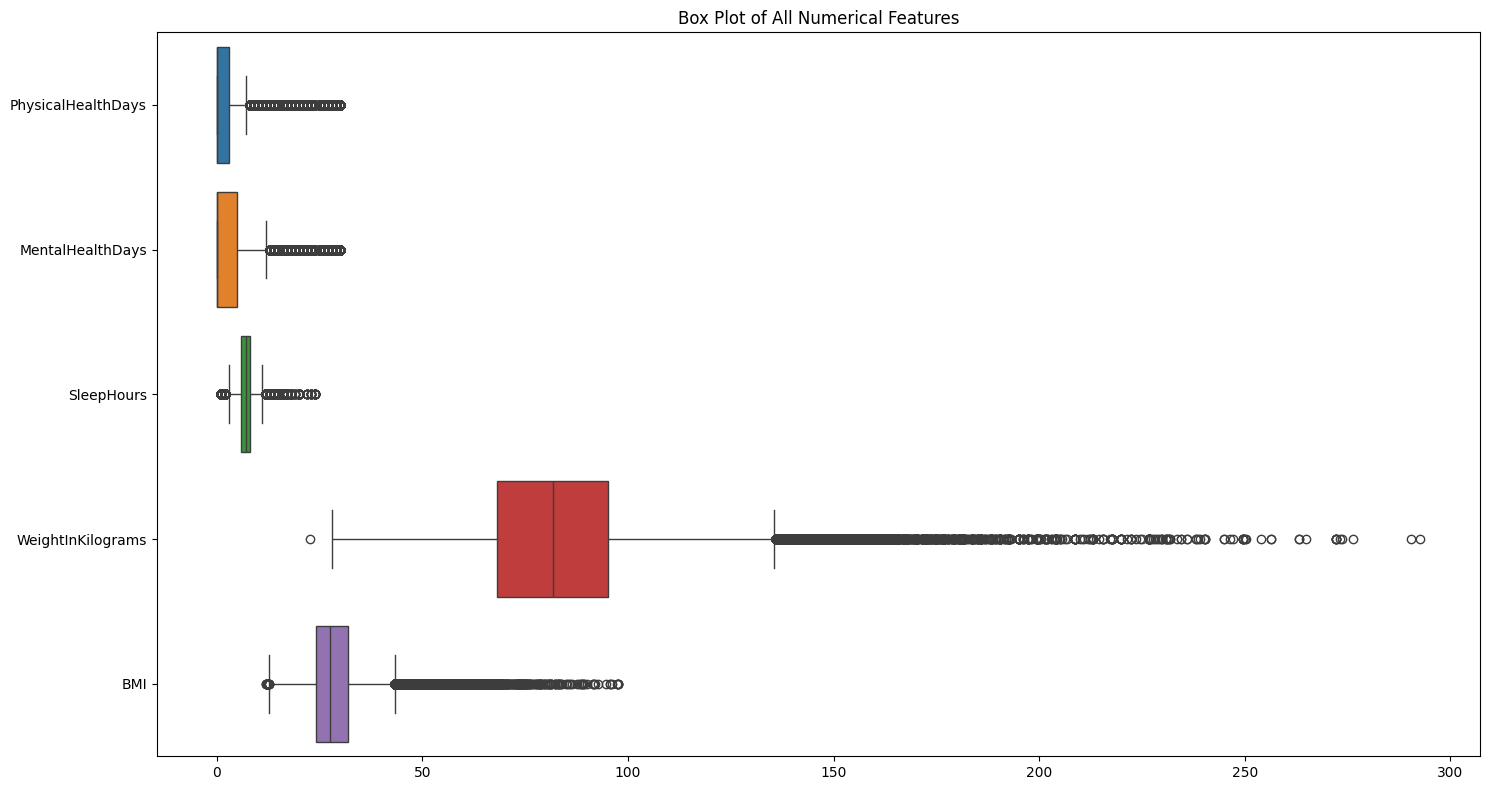

In [44]:
numeric_cols = df.select_dtypes(include='number')  # Select only numeric columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h')  # horizontal box plots
plt.title('Box Plot of All Numerical Features')
plt.tight_layout()
plt.show()


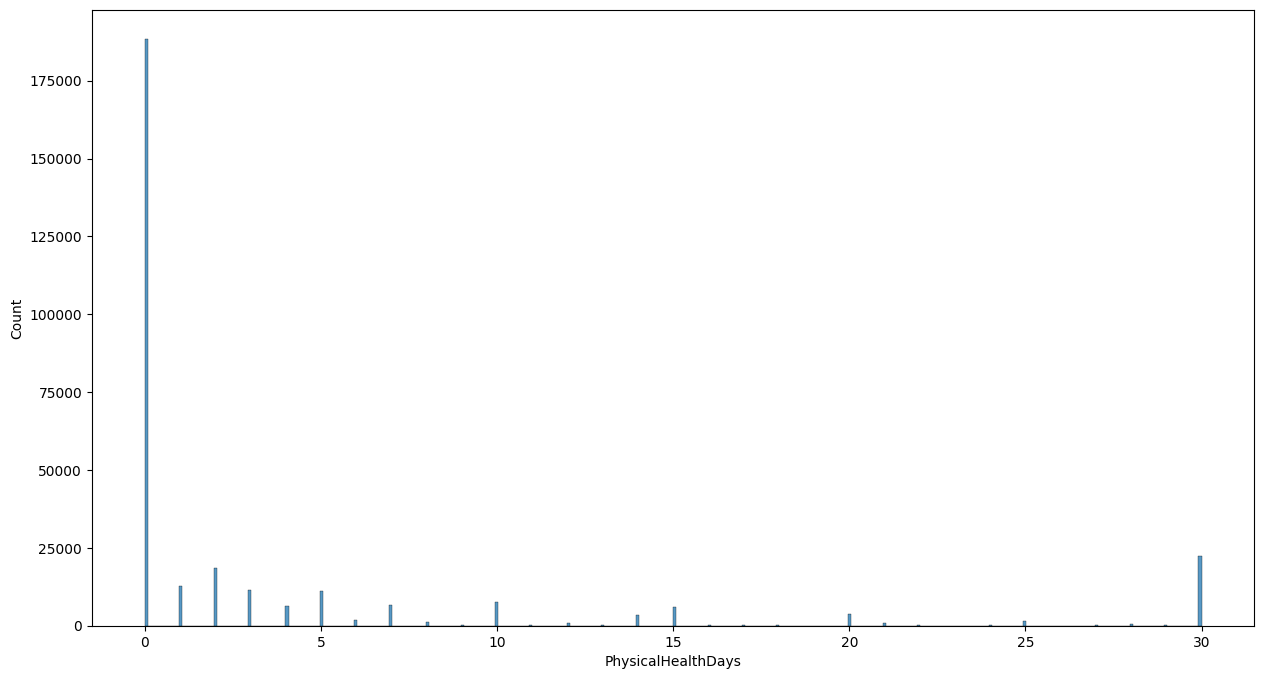

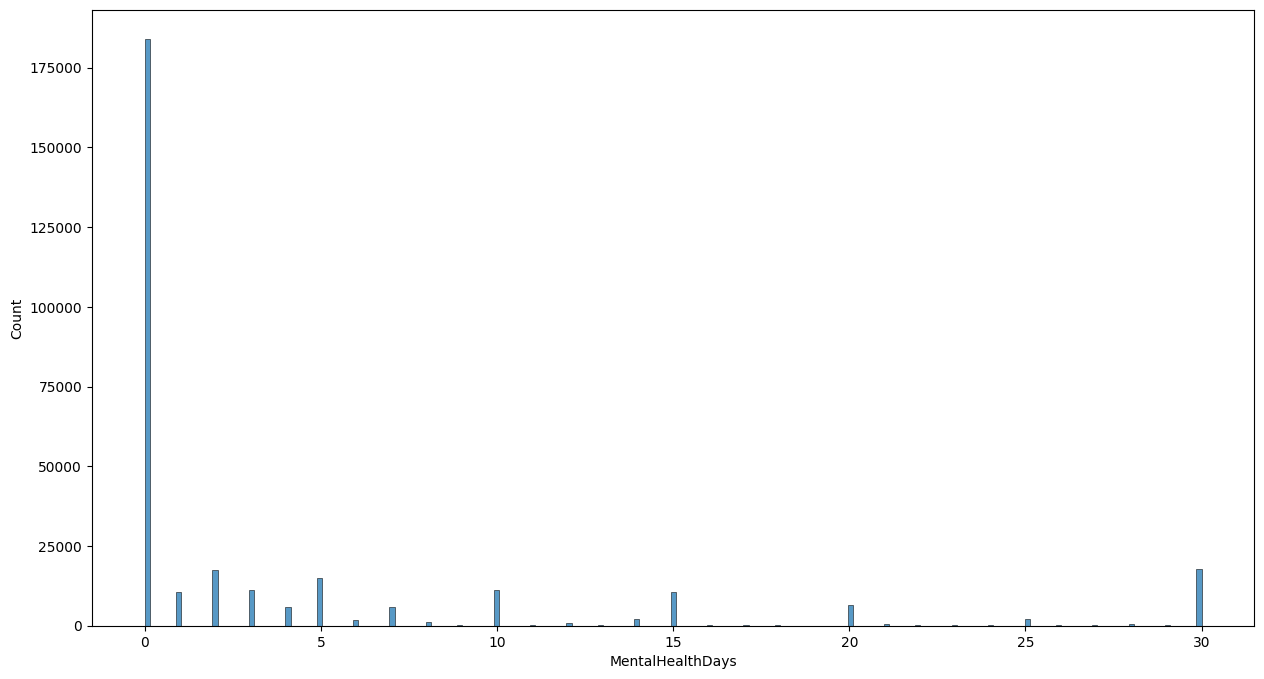

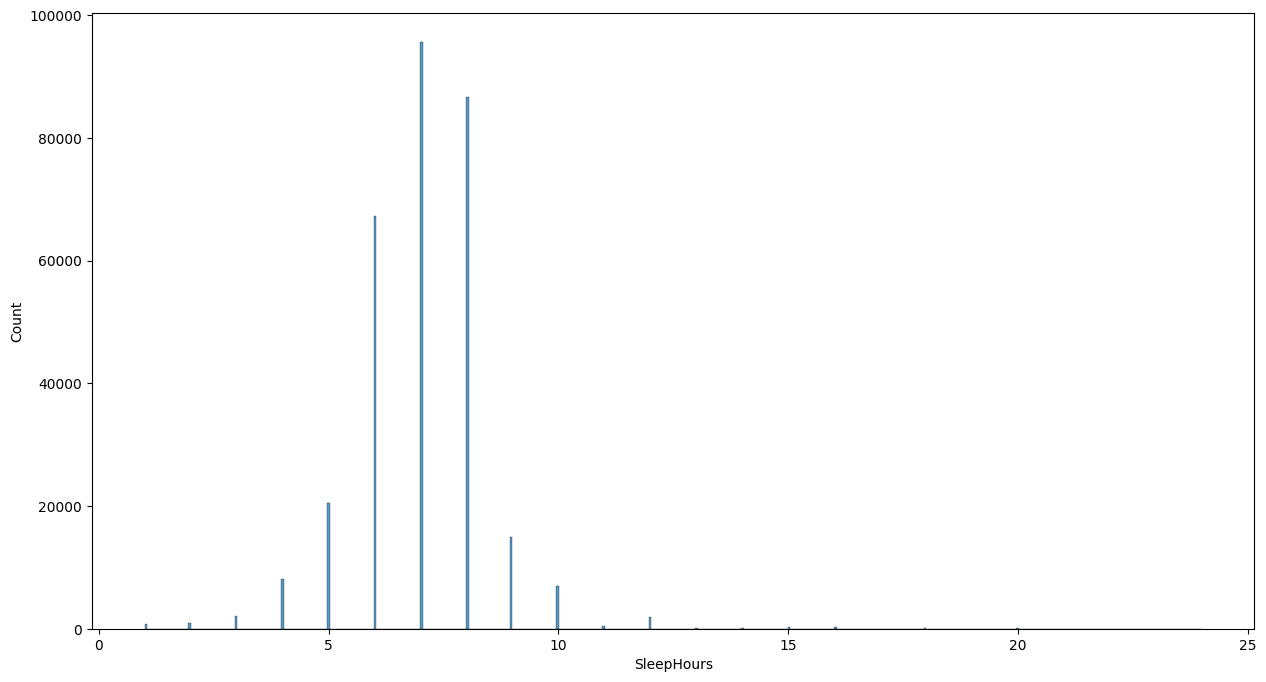

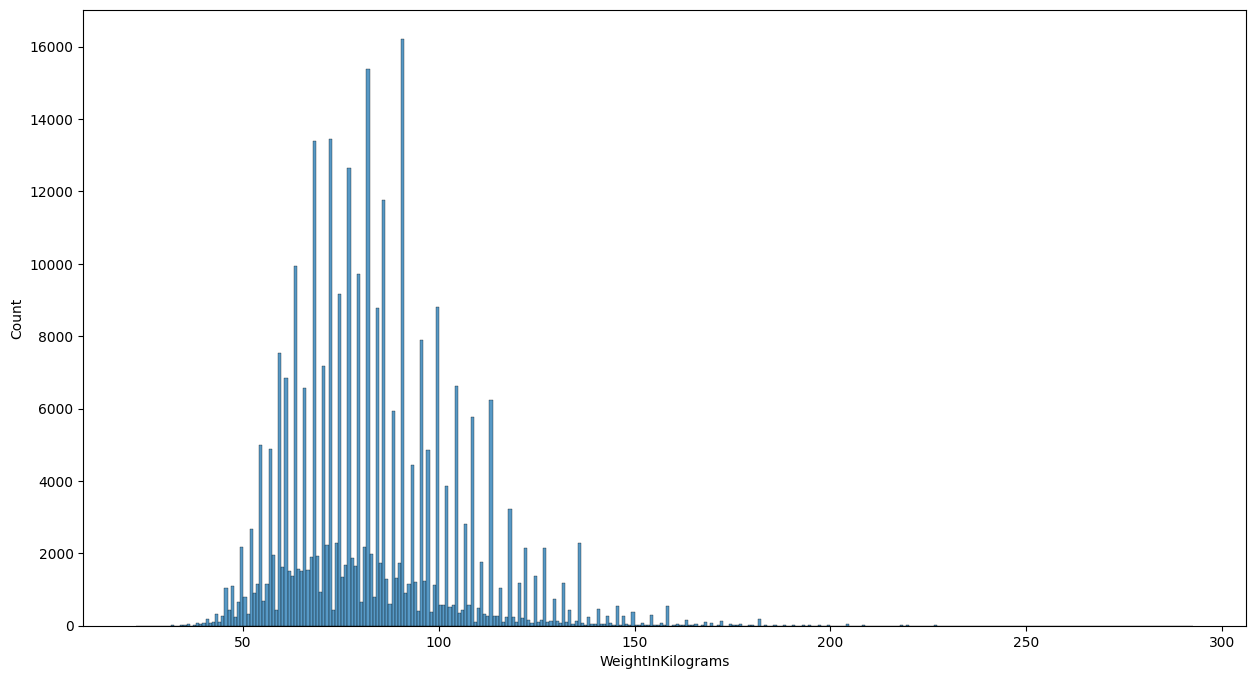

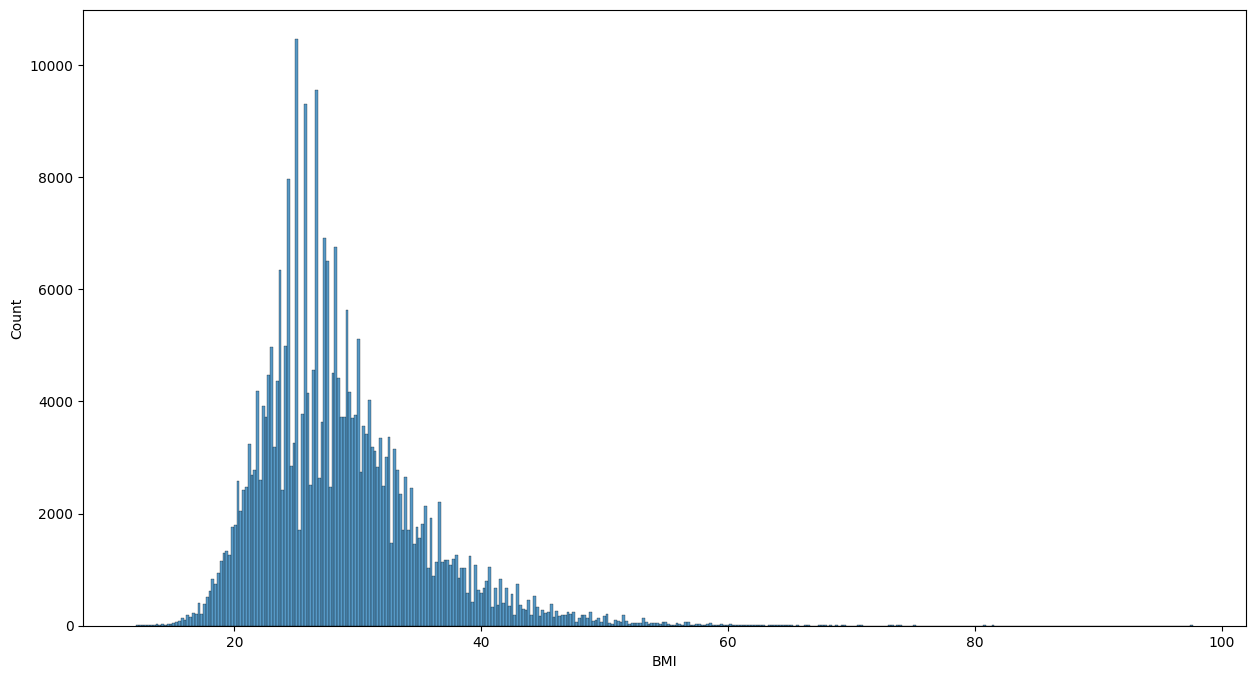

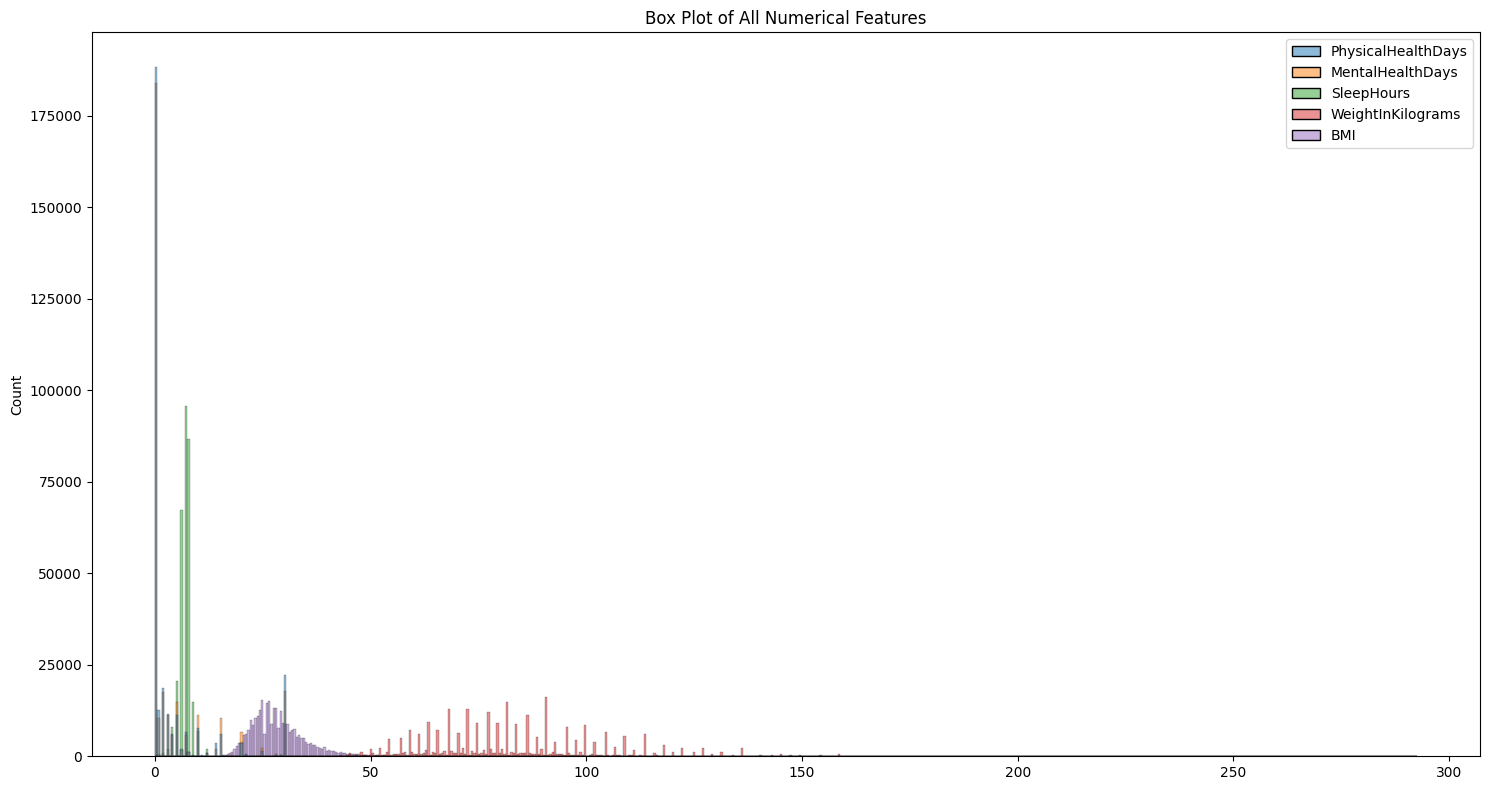

In [45]:
numeric_cols = df.select_dtypes(include='number')  # Select only numeric columns

for i in numeric_cols:
  plt.figure(figsize=(15, 8))
  sns.histplot(data=numeric_cols, x=i)  # horizontal box plots

plt.figure(figsize=(15, 8))
sns.histplot(data=numeric_cols)  # horizontal box plots
plt.title('Box Plot of All Numerical Features')
plt.tight_layout()
plt.show()


# z-score:
SleepHoures
WeightinKilogram
BMi


# IQR:
Physicl Health Days
Mental Health Days

In [46]:
# Corrected code
Q1 = df['PhysicalHealthDays'].quantile(0.25)
Q3 = df['PhysicalHealthDays'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'PhysicalHealthDays' column
outliers_physical = df[(df['PhysicalHealthDays'] < lower_bound) | (df['PhysicalHealthDays'] > upper_bound)]


In [47]:
# Corrected code
Q1 = df['MentalHealthDays'].quantile(0.25)
Q3 = df['MentalHealthDays'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'PhysicalHealthDays' column
outliers_mental = df[(df['MentalHealthDays'] < lower_bound) | (df['MentalHealthDays'] > upper_bound)]


In [48]:
#delete data that has outliers_physical and df[hadheartattack] == no

condition = (
    ((df['PhysicalHealthDays'] < lower_bound) | (df['PhysicalHealthDays'] > upper_bound)) &
    (df['HadHeartAttack'] == 'No')
)

# Remove those rows
df_cleaned = df[~condition].copy()


In [49]:
#delete data that has MentalHealthDays and df[hadheartattack] == no

condition = (
    ((df['MentalHealthDays'] < lower_bound) | (df['MentalHealthDays'] > upper_bound)) &
    (df['HadHeartAttack'] == 'No')
)

# Remove those rows
df_cleaned = df_cleaned[~condition].copy()


<ipython-input-49-bed979a78132>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~condition].copy()


In [50]:
df=df_cleaned
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,248150.000000,248150.000000,248150.000000,248150.000000,248150.000000
mean,1.776974,1.685614,7.086681,83.017967,28.311106
std,4.736516,3.965223,1.339535,20.535818,6.142790
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.140000
50%,0.000000,0.000000,7.000000,81.650000,27.370000
75%,2.000000,2.000000,8.000000,94.800000,31.320000
max,30.000000,30.000000,24.000000,273.520000,97.650000


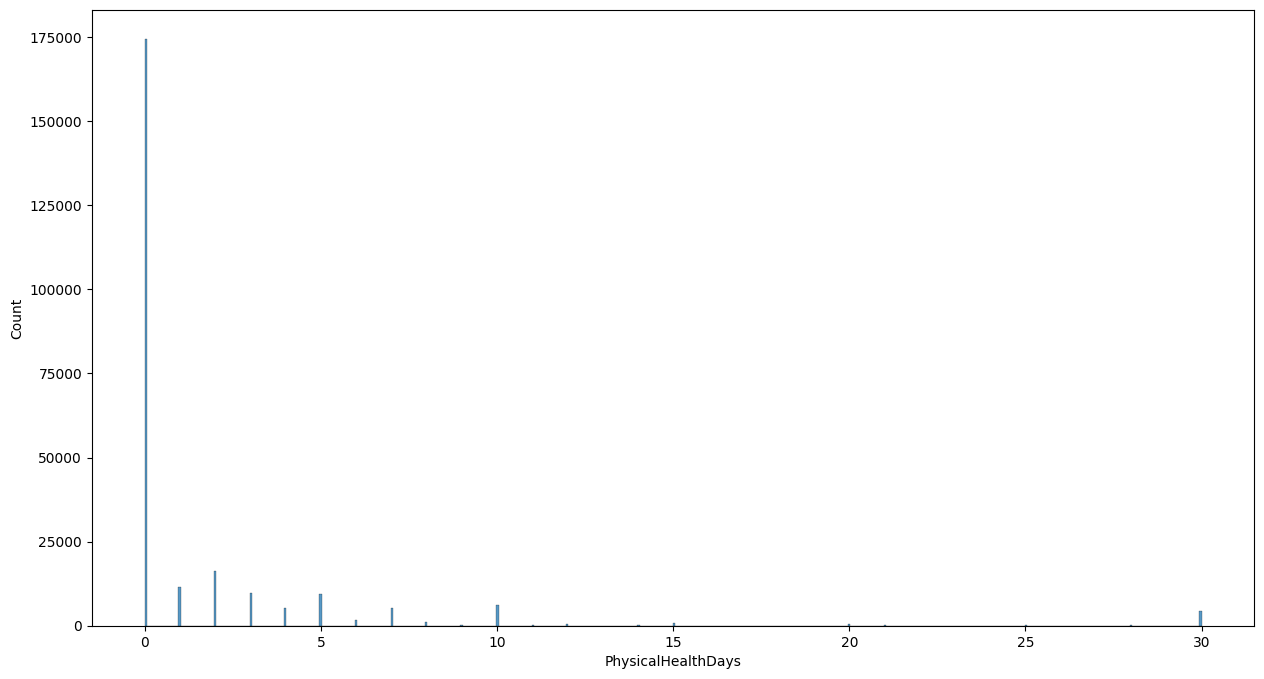

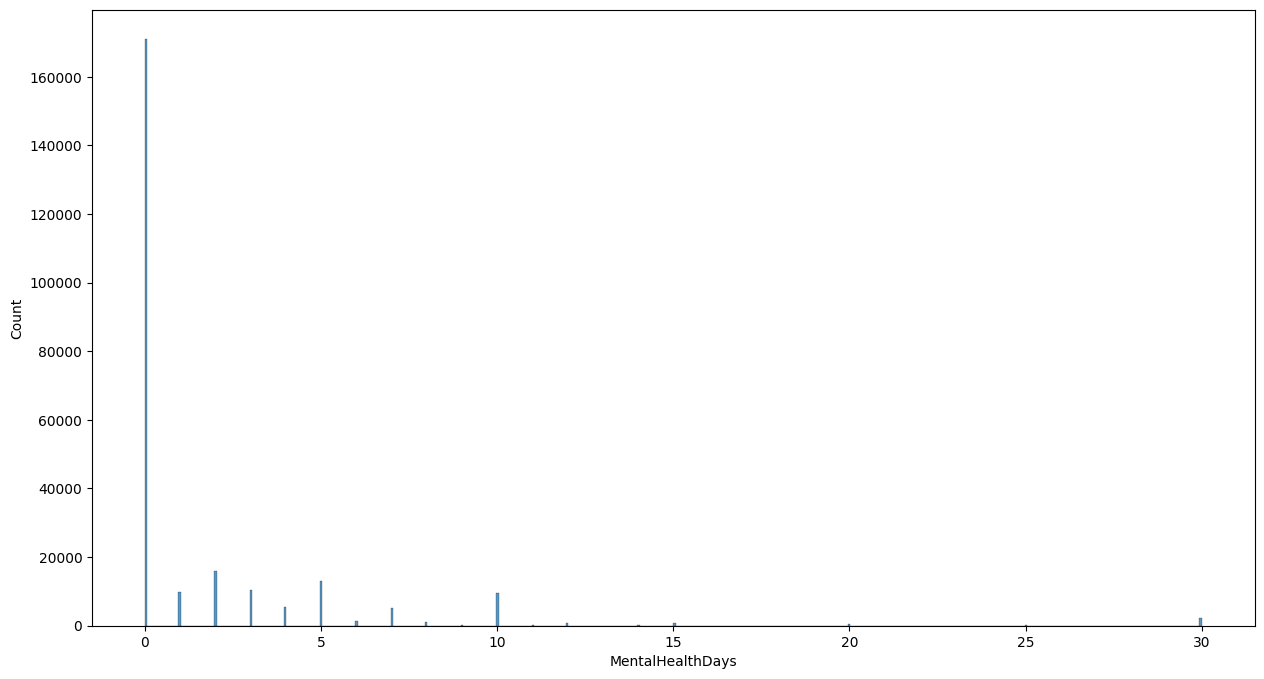

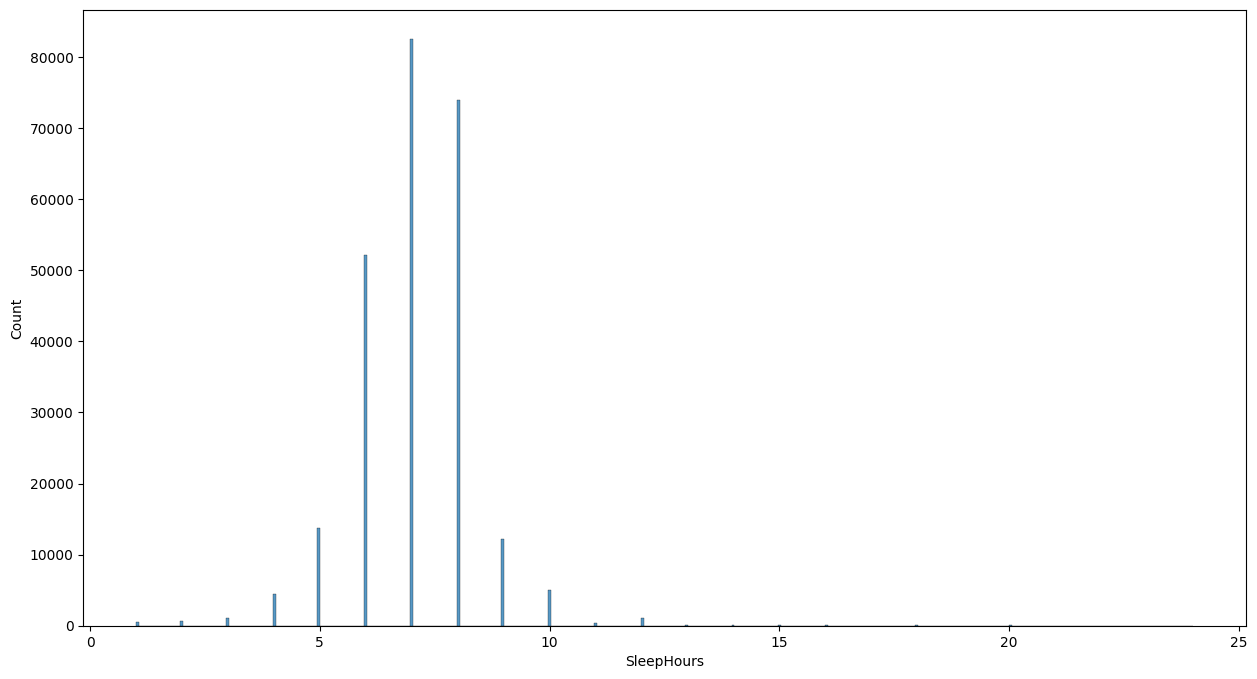

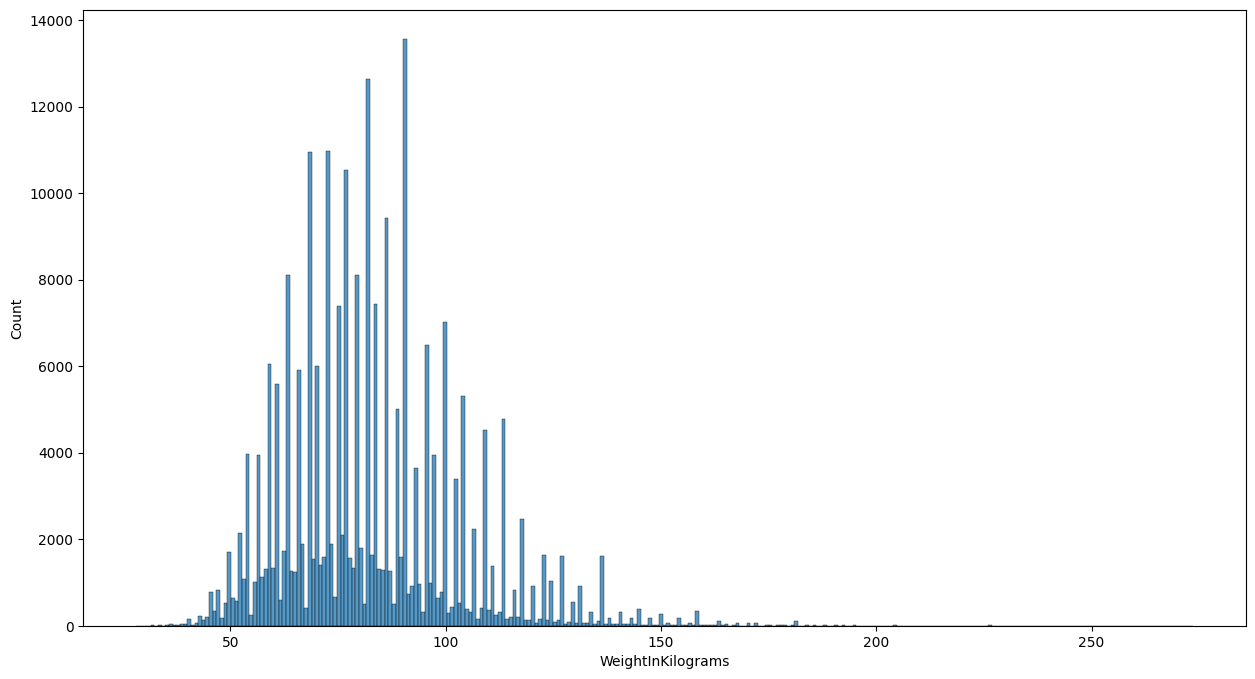

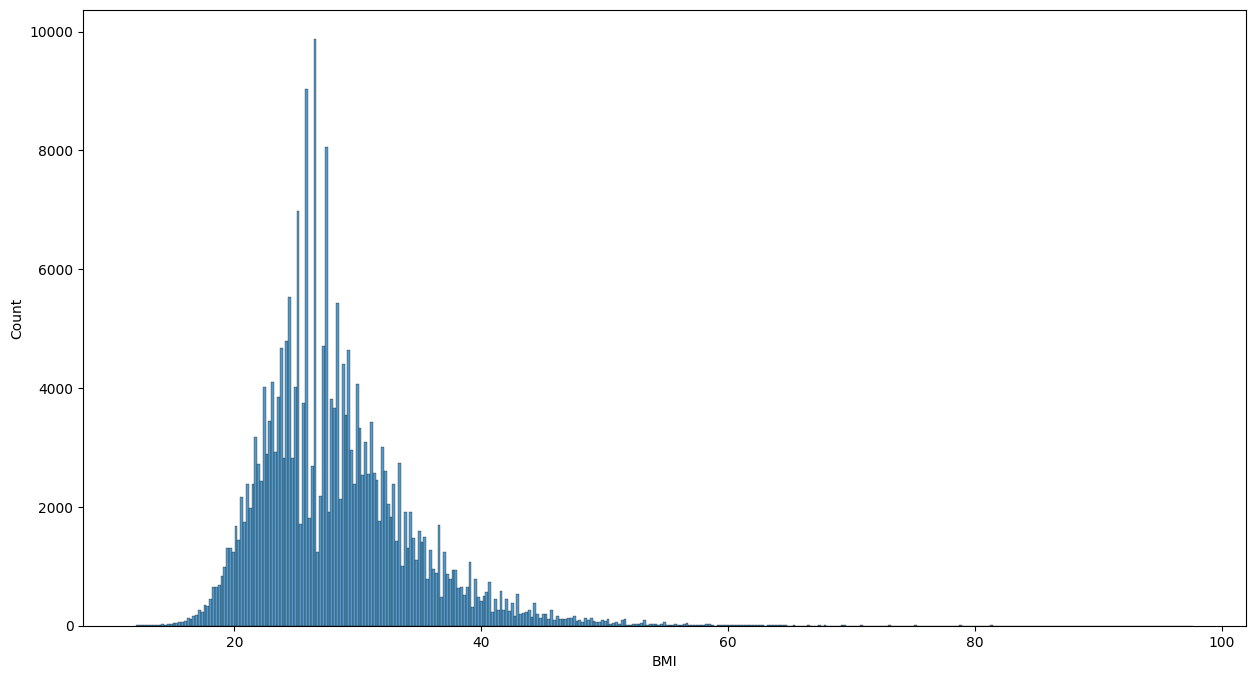

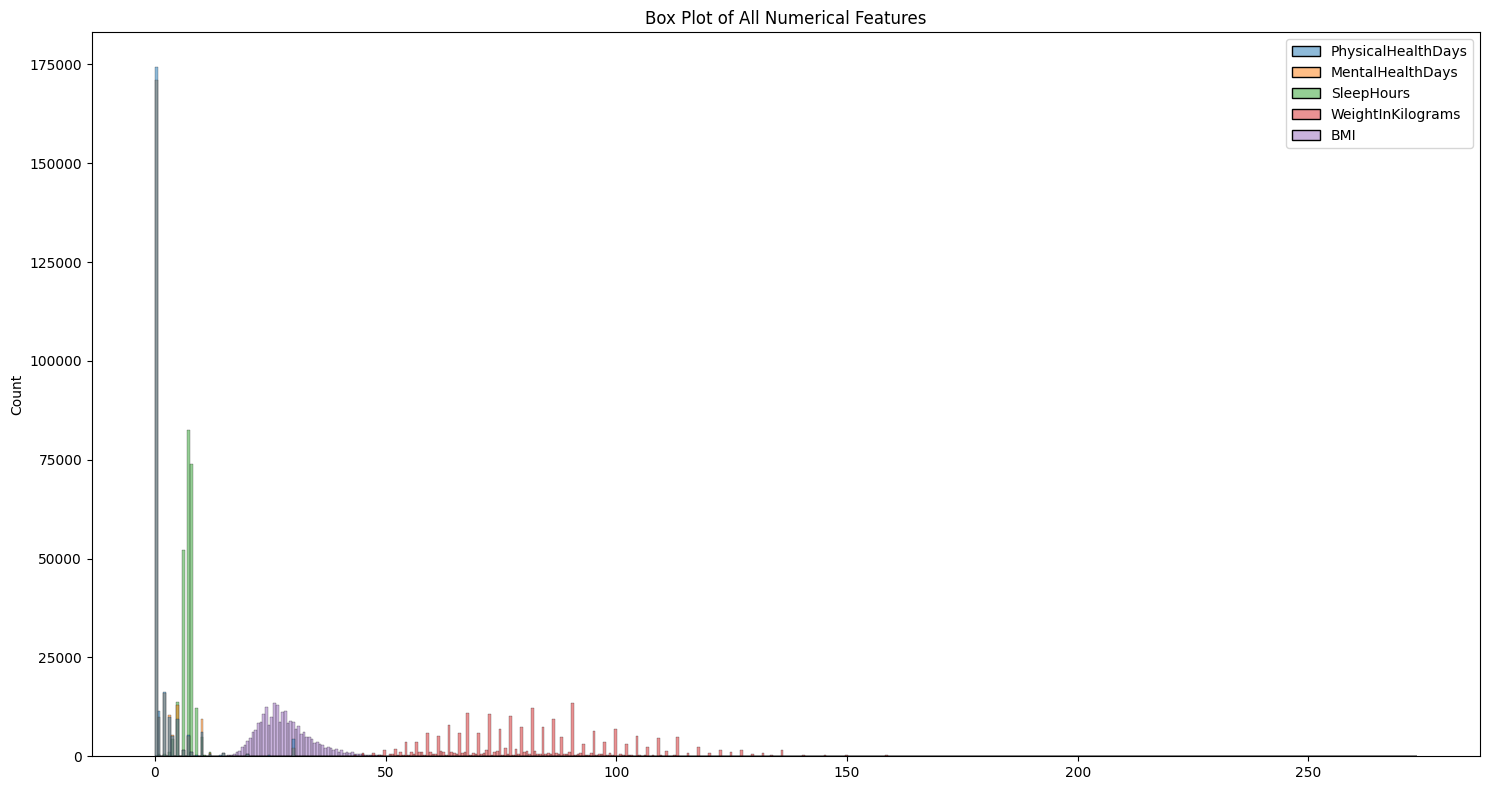

In [51]:
numeric_cols = df.select_dtypes(include='number')  # Select only numeric columns

for i in numeric_cols:
  plt.figure(figsize=(15, 8))
  sns.histplot(data=numeric_cols, x=i)  # horizontal box plots

plt.figure(figsize=(15, 8))
sns.histplot(data=numeric_cols)  # horizontal box plots
plt.title('Box Plot of All Numerical Features')
plt.tight_layout()
plt.show()


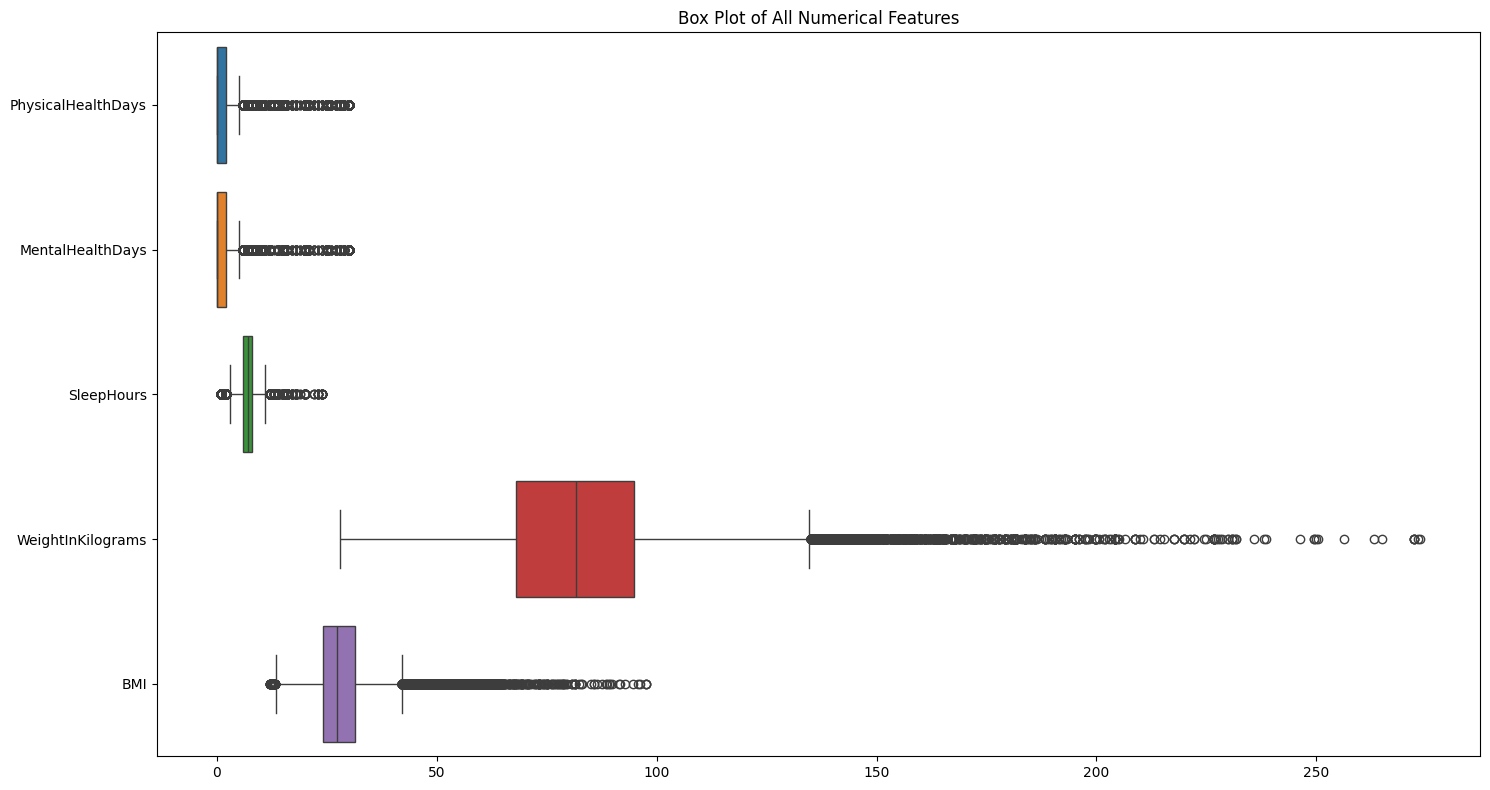

In [52]:
numeric_cols = df.select_dtypes(include='number')  # Select only numeric columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h')  # horizontal box plots
plt.title('Box Plot of All Numerical Features')
plt.tight_layout()
plt.show()


# handle (SleepHoures , WeightinKilogram , BMi) with z-score

In [53]:
cols_to_check = ['SleepHours', 'WeightInKilograms', 'BMI', 'HadHeartAttack']
df = df.dropna(subset=cols_to_check)

# Calculate Z-scores for each target column
z_scores = df[['SleepHours', 'WeightInKilograms', 'BMI']].apply(zscore)

# Define the threshold for outliers
threshold = 3

# Identify rows where any of the features has a Z-score outlier and HadHeartAttack == 'No'
outlier_condition = (
    ((z_scores.abs() > threshold).any(axis=1)) &
    (df['HadHeartAttack'] == 'No')
)

# Remove those rows
df_cleaned = df[~outlier_condition].copy()


In [54]:
df_cleaned.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,241909.000000,241909.000000,241909.000000,241909.000000,241909.000000
mean,1.783439,1.686328,7.093395,82.122183,28.004468
std,4.777154,3.988643,1.200357,18.994256,5.559000
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.120000
50%,0.000000,0.000000,7.000000,80.740000,27.290000
75%,1.000000,2.000000,8.000000,92.990000,31.180000
max,30.000000,30.000000,24.000000,272.160000,95.660000


In [55]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,248150.000000,248150.000000,248150.000000,248150.000000,248150.000000
mean,1.776974,1.685614,7.086681,83.017967,28.311106
std,4.736516,3.965223,1.339535,20.535818,6.142790
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.140000
50%,0.000000,0.000000,7.000000,81.650000,27.370000
75%,2.000000,2.000000,8.000000,94.800000,31.320000
max,30.000000,30.000000,24.000000,273.520000,97.650000


In [56]:
df=df_cleaned

In [57]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,241909.000000,241909.000000,241909.000000,241909.000000,241909.000000
mean,1.783439,1.686328,7.093395,82.122183,28.004468
std,4.777154,3.988643,1.200357,18.994256,5.559000
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,24.120000
50%,0.000000,0.000000,7.000000,80.740000,27.290000
75%,1.000000,2.000000,8.000000,92.990000,31.180000
max,30.000000,30.000000,24.000000,272.160000,95.660000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241909 entries, 0 to 307830
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        241909 non-null  object 
 1   GeneralHealth              241909 non-null  object 
 2   PhysicalHealthDays         241909 non-null  float64
 3   MentalHealthDays           241909 non-null  float64
 4   LastCheckupTime            241909 non-null  object 
 5   PhysicalActivities         241909 non-null  object 
 6   SleepHours                 241909 non-null  float64
 7   RemovedTeeth               241909 non-null  object 
 8   HadAngina                  241909 non-null  object 
 9   HadStroke                  241909 non-null  object 
 10  HadCOPD                    241909 non-null  object 
 11  HadDepressiveDisorder      241909 non-null  object 
 12  HadKidneyDisease           241909 non-null  object 
 13  HadArthritis               241909 

In [59]:
df['SleepHours'].value_counts()

,count
SleepHours,
7.0,81521
8.0,73093
6.0,51192
5.0,13370
9.0,12051
10.0,4878
4.0,4384
3.0,357
12.0,322


In [60]:
df['BMI'][df['BMI'] >= 40].value_counts()


,count
BMI,
40.35,300
40.69,261
41.60,212
42.91,190
40.18,163
...,...
46.65,1
41.65,1
42.26,1


In [61]:
df=df[df['BMI'] <= 40]

In [62]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,233824.000000,233824.000000,233824.000000,233824.000000,233824.000000
mean,1.721705,1.643026,7.098052,80.790084,27.484286
std,4.648062,3.889778,1.190985,17.641420,4.844304
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,68.040000,23.960000
50%,0.000000,0.000000,7.000000,79.380000,27.120000
75%,1.000000,2.000000,8.000000,90.720000,30.680000
max,30.000000,30.000000,24.000000,188.690000,40.000000


In [63]:
df['WeightInKilograms'][df['WeightInKilograms']>=100].value_counts()

,count
WeightInKilograms,
104.33,4715
108.86,4019
113.40,3681
102.06,3084
106.59,1891
...,...
130.00,1
115.00,1
141.97,1


In [64]:
df=df[df['WeightInKilograms']<=100]

In [65]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,202747.000000,202747.000000,202747.000000,202747.000000,202747.000000
mean,1.671566,1.636749,7.114788,76.045622,26.453978
std,4.534994,3.836128,1.183664,13.326971,4.191203
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,65.770000,23.490000
50%,0.000000,0.000000,7.000000,77.110000,26.290000
75%,1.000000,2.000000,8.000000,86.180000,29.150000
max,30.000000,30.000000,24.000000,100.000000,39.990000


In [66]:
df = df[df['SleepHours'] <= 18]

In [67]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
count,202727.000000,202727.000000,202727.000000,202727.000000,202727.000000
mean,1.669585,1.635347,7.113448,76.045808,26.453991
std,4.528999,3.831688,1.175938,13.326893,4.191095
min,0.000000,0.000000,1.000000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,65.770000,23.490000
50%,0.000000,0.000000,7.000000,77.110000,26.290000
75%,1.000000,2.000000,8.000000,86.180000,29.150000
max,30.000000,30.000000,18.000000,100.000000,39.990000


# ✅ 1. Heart Attack Rate by Age Group


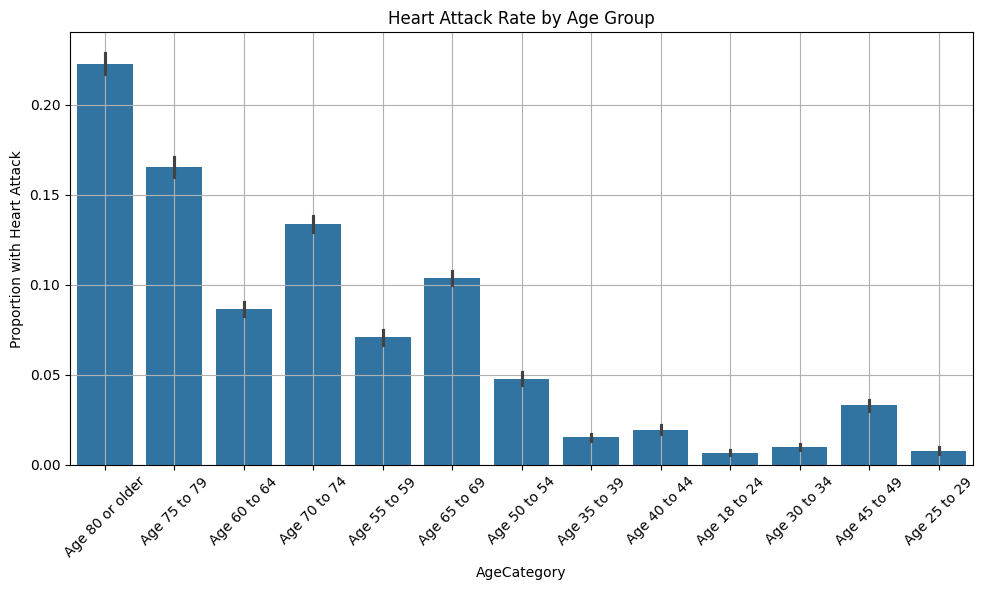

In [68]:
# Create a numeric version of the target column
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Plot with numeric target
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='AgeCategory', y='HeartAttackBinary')
plt.title('Heart Attack Rate by Age Group')
plt.ylabel('Proportion with Heart Attack')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ 2. Heart Attack Rate by Sleep Hours (Binned)

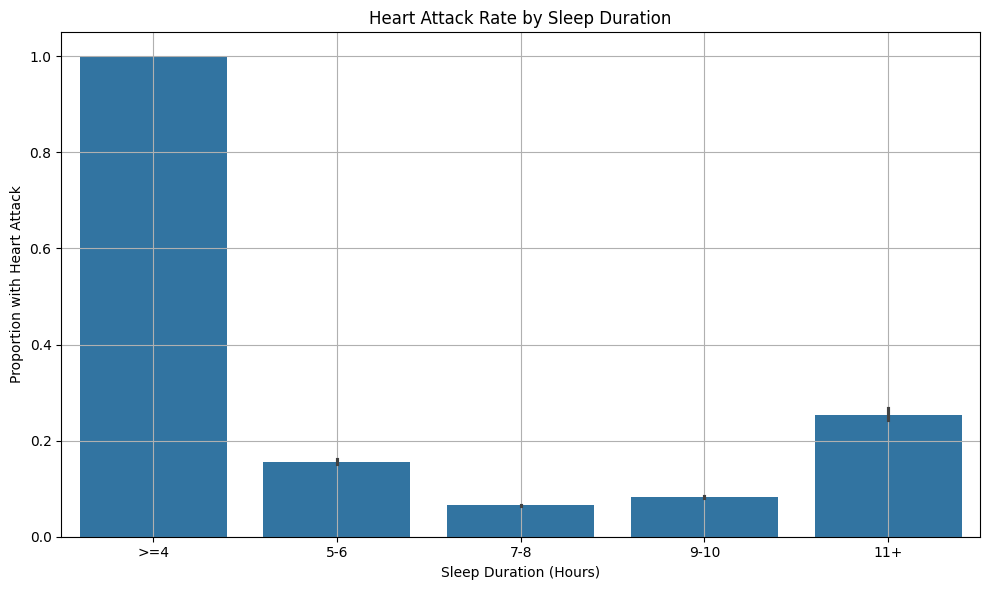

In [69]:
# Bin sleep hours
df['SleepBin'] = pd.cut(df['SleepHours'], bins=[0, 4, 6, 8, 10, 24],
                        labels=['>=4', '5-6', '7-8', '9-10', '11+'], right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SleepBin', y='HeartAttackBinary')
plt.title('Heart Attack Rate by Sleep Duration')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Proportion with Heart Attack')
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ 3. Heart Attack by Physical Activity

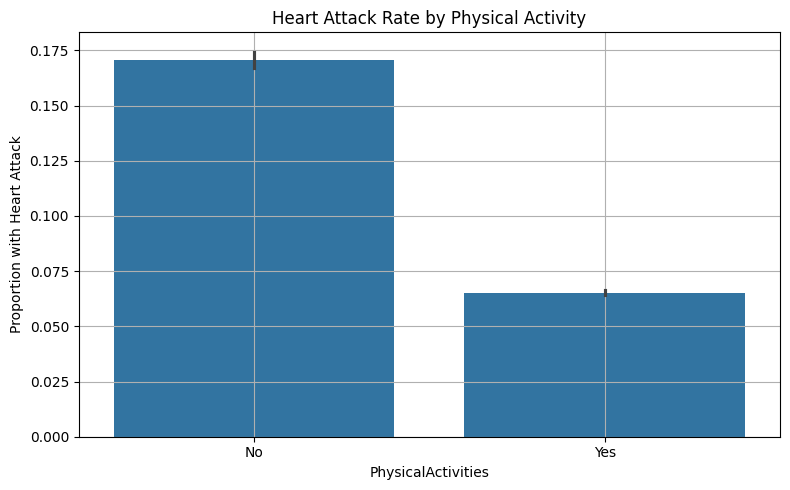

In [70]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='PhysicalActivities', y='HeartAttackBinary')
plt.title('Heart Attack Rate by Physical Activity')
plt.ylabel('Proportion with Heart Attack')
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ 4. Heart Attack by General Health



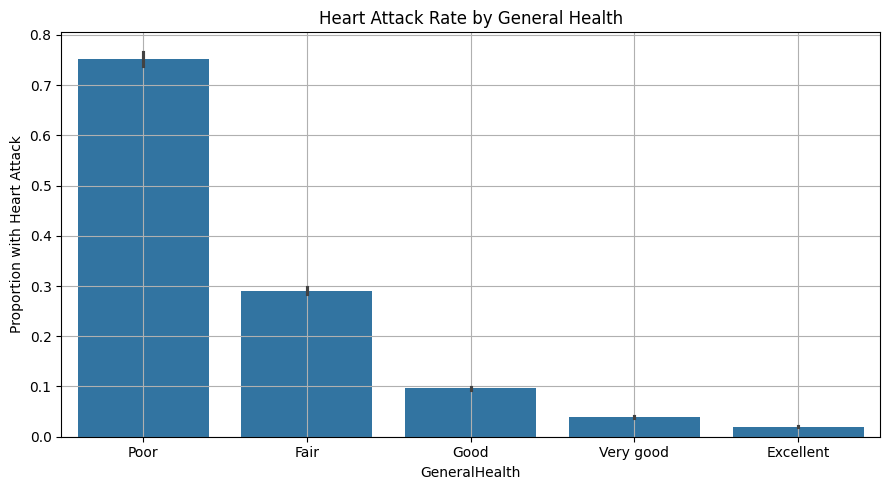

In [71]:
plt.figure(figsize=(9, 5))
sns.barplot(data=df, x='GeneralHealth', y='HeartAttackBinary')
plt.title('Heart Attack Rate by General Health')
plt.ylabel('Proportion with Heart Attack')
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ 5. Heart Attack by Last Checkup Time



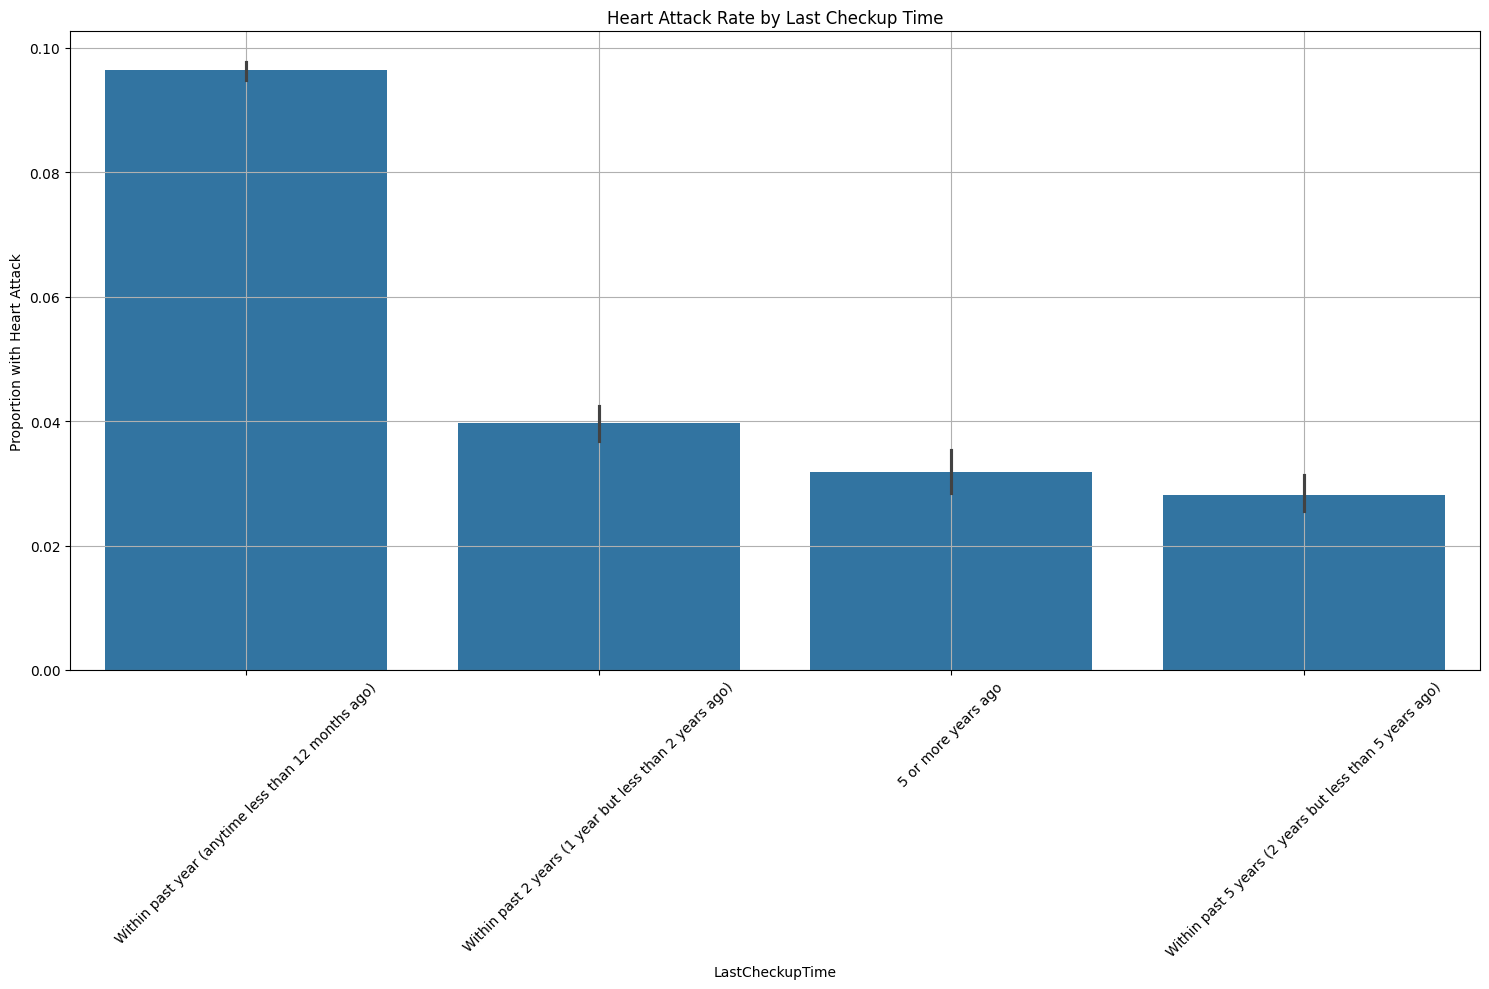

In [72]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='LastCheckupTime', y='HeartAttackBinary')
plt.title('Heart Attack Rate by Last Checkup Time')
plt.ylabel('Proportion with Heart Attack')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ 6. WeightInKilograms by BMI

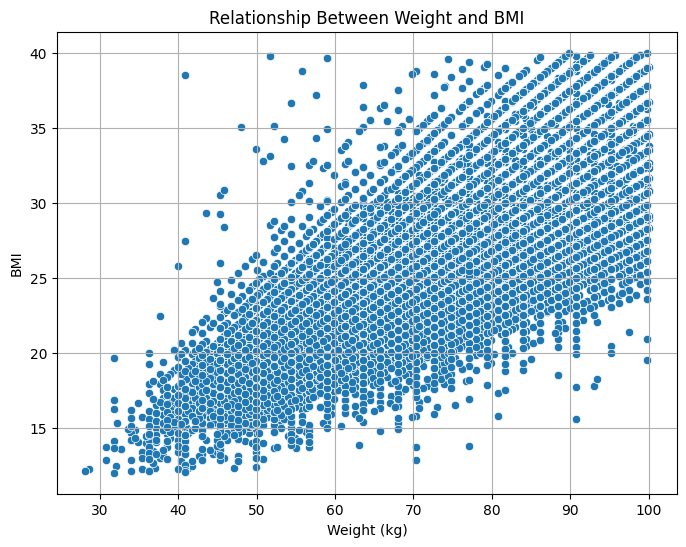

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='WeightInKilograms', y='BMI')
plt.title('Relationship Between Weight and BMI')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [74]:
catlist=[]
numlist=[]
for coulmn in df.columns:
  if df[coulmn].dtype == 'object':
    catlist.append(coulmn)
  else:
    numlist.append(coulmn)
catlist

['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HighRiskLastYear',
 'CovidPos',
 'HadHeartAttack']

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202727 entries, 0 to 307830
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Sex                        202727 non-null  object  
 1   GeneralHealth              202727 non-null  object  
 2   PhysicalHealthDays         202727 non-null  float64 
 3   MentalHealthDays           202727 non-null  float64 
 4   LastCheckupTime            202727 non-null  object  
 5   PhysicalActivities         202727 non-null  object  
 6   SleepHours                 202727 non-null  float64 
 7   RemovedTeeth               202727 non-null  object  
 8   HadAngina                  202727 non-null  object  
 9   HadStroke                  202727 non-null  object  
 10  HadCOPD                    202727 non-null  object  
 11  HadDepressiveDisorder      202727 non-null  object  
 12  HadKidneyDisease           202727 non-null  object  
 13  HadArthritis       

In [76]:
df.drop('HeartAttackBinary', axis=1, inplace=True)
df.drop('SleepBin', axis=1, inplace=True)

In [77]:
from sklearn.preprocessing import LabelEncoder

for col in catlist:
  le = LabelEncoder()  # Create a new LabelEncoder for each column
  df[col] = le.fit_transform(df[col])  # Fit and transform on one column at a time

In [78]:
#model random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(df.drop('HadHeartAttack', axis=1), df['HadHeartAttack'], test_size=0.2, random_state=42)

In [79]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object with a fixed random seed for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_smote, y_smote = smote.fit_resample(x_train, y_train)


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                    # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,               # Use all processors
                           verbose=1)

# Fit the grid search on the SMOTE-balanced data
grid_search.fit(x_smote, y_smote)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on training (CV):", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


In [81]:
rf=RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
rf.fit(x_smote, y_smote)

RandomForestClassifier()

In [82]:
rf.score(x_smote, y_smote)

0.9999865368822112

In [83]:
rf.score(x_test, y_test)

0.9308193163320673

In [84]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     37144
           1       0.58      0.63      0.61      3402

    accuracy                           0.93     40546
   macro avg       0.77      0.80      0.78     40546
weighted avg       0.93      0.93      0.93     40546

